# Forecasting Passenger Trafic

Aulia Khalqillah

## Memasukan Library

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score

## Membaca Data

In [188]:
df = pd.read_csv('input00.txt',sep='\t').reset_index()
df = df.rename(columns={'index':'bulan_str','60':'jumlah_penumpang'})
df.head()

,bulan_str,jumlah_penumpang
0,MonthNum_1,1226800
1,MonthNum_2,926891
2,MonthNum_3,782725
3,MonthNum_4,1023038
4,MonthNum_5,1126293


## Menambhkan Kolom Baru

Penambahan kolom bulan dalam tipe data integer dan kolom informasi yang menunjukan Data Riil dan Data Prediksi

In [189]:
months = range(1,61)
months = list(months)
df['bulan_num'] = months
df['informasi'] = ['Data Riil']*60
df.head()

,bulan_str,jumlah_penumpang,bulan_num,informasi
0,MonthNum_1,1226800,1,Data Riil
1,MonthNum_2,926891,2,Data Riil
2,MonthNum_3,782725,3,Data Riil
3,MonthNum_4,1023038,4,Data Riil
4,MonthNum_5,1126293,5,Data Riil


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bulan_str         60 non-null     object
 1   jumlah_penumpang  60 non-null     int64 
 2   bulan_num         60 non-null     int64 
 3   informasi         60 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


## Menghitung Nilai Korelasi Antara Jumlah Penumpang Selama 60 Bulan

In [191]:
corr = df[['jumlah_penumpang','bulan_num']].corr()
corr

,jumlah_penumpang,bulan_num
jumlah_penumpang,1.000000,-0.177904
bulan_num,-0.177904,1.000000


Berdasarkan nilai korelasi antara jumlah penumpang untuk setiap bulannya tidak terlalu signifikan berhubungan satu sama lain. Artinya, perubahan jumlah penumpang setiap bulannya tidak linear atau fluktuatif.

## Membuat Model

In [192]:
X = df[['bulan_num','jumlah_penumpang']]
y = df['jumlah_penumpang']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Linear Regression

In [193]:
linreg = LinearRegression()
linreg = linreg.fit(X_train,y_train)
y_predict = linreg.predict(X_test)
print('MSE:',mean_squared_error(y_test,y_predict,squared=True))
print('RMSE:',mean_squared_error(y_test,y_predict,squared=False))
print('R2:', r2_score(y_test,y_predict))

MSE: 0.0
RMSE: 0.0
R2: 1.0


## Random Forest Regressor

In [194]:
ranfor = RandomForestRegressor()
ranfor = ranfor.fit(X_train,y_train)
y_predict = ranfor.predict(X_test)
print('MSE:',mean_squared_error(y_test,y_predict,squared=True))
print('RMSE:',mean_squared_error(y_test,y_predict,squared=False))
print('R2:', r2_score(y_test,y_predict))

MSE: 1854984455.0243971
RMSE: 43069.53047137149
R2: 0.972877061976101


## Gradient Boosting Regressor

In [195]:
gradreg = GradientBoostingRegressor()
gradreg = gradreg.fit(X_train,y_train)
y_predict = gradreg.predict(X_test)
print('MSE:',mean_squared_error(y_test,y_predict,squared=True))
print('RMSE:',mean_squared_error(y_test,y_predict,squared=False))
print('R2:', r2_score(y_test,y_predict))

MSE: 912355498.7365543
RMSE: 30205.223037358195
R2: 0.9866598549756205


## Decision Tree Regressor

In [196]:
dtr = DecisionTreeRegressor()
dtr = dtr.fit(X_train,y_train)
y_predict = dtr.predict(X_test)
print('MSE:',mean_squared_error(y_test,y_predict,squared=True))
print('RMSE:',mean_squared_error(y_test,y_predict,squared=False))
print('R2:', r2_score(y_test,y_predict))

MSE: 2233056503.0555553
RMSE: 47255.22725641636
R2: 0.9673490238841684


## Random Forest Classifier

In [197]:
ranclass = RandomForestClassifier()
ranclass = ranclass.fit(X_train,y_train)
y_predict = ranclass.predict(X_test)
print('MSE:',mean_squared_error(y_test,y_predict,squared=True))
print('RMSE:',mean_squared_error(y_test,y_predict,squared=False))
print('R2:', r2_score(y_test,y_predict))

MSE: 4399834660.166667
RMSE: 66331.24949951317
R2: 0.9356671467084969


## Gradient Boosting Classifier

In [198]:
gradclass = GradientBoostingClassifier()
gradclass = gradclass.fit(X_train,y_train)
y_predict = gradclass.predict(X_test)
print('MSE:',mean_squared_error(y_test,y_predict,squared=True))
print('RMSE:',mean_squared_error(y_test,y_predict,squared=False))
print('R2:', r2_score(y_test,y_predict))

MSE: 47567878811.611115
RMSE: 218100.6162568348
R2: 0.3044790076590169


## Decision Tree Classifier

In [199]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
y_predict = dtc.predict(X_test)
print('MSE:',mean_squared_error(y_test,y_predict,squared=True))
print('RMSE:',mean_squared_error(y_test,y_predict,squared=False))
print('R2:', r2_score(y_test,y_predict))

MSE: 28484715223.5
RMSE: 168774.1544890686
R2: 0.5835063935211029


Metode Linear Regresion memberikan hasil model yang terbaik dibandingkan dua metode lainnya dengan nilai R2 sebesar 100%. Sehingga, model ini mampu memprediksi jumlah penumpang untuk 12 bulan kedepan.

## Membuat deret bulan untuk 12 bulan kedepan

12 bulan kedepan dimulai dari bulan ke-61 hingga bulan ke-72

In [200]:
next_months = np.arange(61,73)
test_data = X_test.tail(12)
test_data['bulan_num'] = next_months
test_data

,bulan_num,jumlah_penumpang
33,61,1065316
48,62,543605
12,63,1317458
57,64,574319
46,65,1023262
50,66,734714
31,67,1131150
3,68,1023038
52,69,1461091
17,70,1034165


## Prediksi Jumlah Penumpang 12 Bulan Kedepan

In [201]:
predicted_num_pasangger = linreg.predict(test_data)
predicted = predicted_num_pasangger.tolist()
predicted

[1065316.0,
 543605.0,
 1317458.0,
 574319.0,
 1023262.0,
 734714.0,
 1131150.0,
 1023038.0,
 1461091.0,
 1034165.0,
 1129954.0,
 1165880.0]

In [202]:
month = []
num_month = []
for i in range(1,13):
    m = 'MonthNum_'+str(60+i)
    n = 60+i
    month.append(m)
    num_month.append(n)

final_predicted = pd.DataFrame([month, predicted, num_month],index=['bulan_str','jumlah_penumpang','bulan_num']).T
final_predicted['informasi'] = ['Data Prediksi']*12
final_predicted

,bulan_str,jumlah_penumpang,bulan_num,informasi
0,MonthNum_61,1.06532e+06,61,Data Prediksi
1,MonthNum_62,543605,62,Data Prediksi
2,MonthNum_63,1.31746e+06,63,Data Prediksi
3,MonthNum_64,574319,64,Data Prediksi
4,MonthNum_65,1.02326e+06,65,Data Prediksi
5,MonthNum_66,734714,66,Data Prediksi
6,MonthNum_67,1.13115e+06,67,Data Prediksi
7,MonthNum_68,1.02304e+06,68,Data Prediksi
8,MonthNum_69,1.46109e+06,69,Data Prediksi
9,MonthNum_70,1.03416e+06,70,Data Prediksi


## Menggabungkan Data Riil Dengan Data Prediksi

In [203]:
merge_data = df.append(final_predicted)
merge_data['jumlah_penumpang'] = merge_data['jumlah_penumpang'].astype(int)
merge_data['bulan_num'] = merge_data['bulan_num'].astype(int)
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 11
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bulan_str         72 non-null     object
 1   jumlah_penumpang  72 non-null     int64 
 2   bulan_num         72 non-null     int64 
 3   informasi         72 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.8+ KB


## Hasil Visualisasi

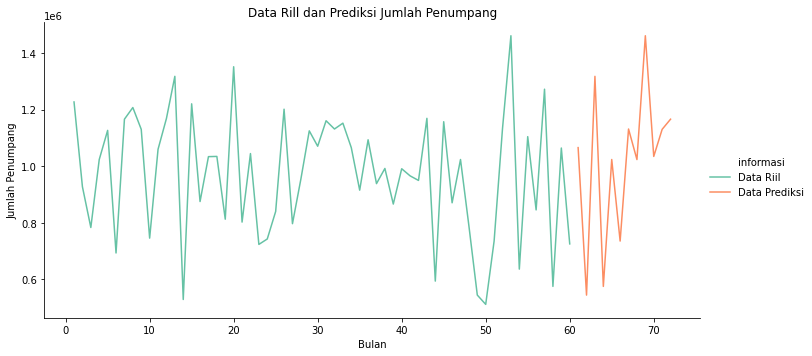

In [204]:
sns.relplot(x='bulan_num',y='jumlah_penumpang',data=merge_data,hue='informasi',kind='line',height=5,aspect=2,palette='Set2')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang')
plt.title('Data Rill dan Prediksi Jumlah Penumpang')
plt.show()